In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('global_food_wastage_dataset.csv')
data

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06
...,...,...,...,...,...,...,...,...
4995,France,2021,Beverages,47524.74,48058.40,77.41,1087.46,39.73
4996,Australia,2021,Beverages,32337.72,32705.08,194.35,1336.32,64.83
4997,China,2018,Meat & Seafood,20640.96,22485.33,21.04,16.13,31.23
4998,Australia,2021,Beverages,26566.64,29357.57,197.14,1086.17,69.95


In [3]:
data.isna().sum()

Country                      0
Year                         0
Food Category                0
Total Waste (Tons)           0
Economic Loss (Million $)    0
Avg Waste per Capita (Kg)    0
Population (Million)         0
Household Waste (%)          0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    5000 non-null   object 
 1   Year                       5000 non-null   int64  
 2   Food Category              5000 non-null   object 
 3   Total Waste (Tons)         5000 non-null   float64
 4   Economic Loss (Million $)  5000 non-null   float64
 5   Avg Waste per Capita (Kg)  5000 non-null   float64
 6   Population (Million)       5000 non-null   float64
 7   Household Waste (%)        5000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


In [5]:
data['Food Category'].unique()

array(['Fruits & Vegetables', 'Prepared Food', 'Dairy Products',
       'Beverages', 'Meat & Seafood', 'Grains & Cereals', 'Frozen Food',
       'Bakery Items'], dtype=object)

In [6]:
data['Country'].unique()

array(['Australia', 'Indonesia', 'Germany', 'France', 'India', 'China',
       'UK', 'South Africa', 'Japan', 'USA', 'Brazil', 'Saudi Arabia',
       'Italy', 'Spain', 'Mexico', 'Argentina', 'Canada', 'South Korea',
       'Russia', 'Turkey'], dtype=object)

In [7]:
for i in ['Total Waste (Tons)','Economic Loss (Million $)','Avg Waste per Capita (Kg)',
          'Population (Million)','Household Waste (%)']:
    data[i] = data[i].astype('int64')

In [8]:
data.head(1)

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Australia,2019,Fruits & Vegetables,19268,18686,72,87,53


In [9]:
data.dtypes

Country                      object
Year                          int64
Food Category                object
Total Waste (Tons)            int64
Economic Loss (Million $)     int64
Avg Waste per Capita (Kg)     int64
Population (Million)          int64
Household Waste (%)           int64
dtype: object

In [10]:
data.describe()

,Year,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2021.015600,25061.286400,25039.208200,108.974200,706.109400,49.566600
std,1.999239,14245.119449,14620.234515,51.930373,402.541131,11.594777
min,2018.000000,502.000000,406.000000,20.000000,11.000000,30.000000
25%,2019.000000,12783.500000,12611.750000,64.000000,350.000000,39.750000
50%,2021.000000,24864.500000,24427.500000,110.000000,713.000000,50.000000
75%,2023.000000,37470.500000,37145.500000,154.000000,1057.000000,60.000000
max,2024.000000,49990.000000,59228.000000,199.000000,1399.000000,70.000000


In [11]:
data['Food Category'].value_counts()

Food Category
Prepared Food          711
Beverages              639
Bakery Items           630
Fruits & Vegetables    620
Dairy Products         616
Meat & Seafood         605
Frozen Food            596
Grains & Cereals       583
Name: count, dtype: int64

In [12]:
data.head(2)

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Australia,2019,Fruits & Vegetables,19268,18686,72,87,53
1,Indonesia,2019,Prepared Food,3916,4394,192,1153,30


In [13]:
data.shape

(5000, 8)

In [14]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
for i in ['Country','Food Category']:
    data[i] = le.fit_transform(data[i])
    data[i] = data[i].astype('int64')

In [15]:
data.dtypes

Country                      int64
Year                         int64
Food Category                int64
Total Waste (Tons)           int64
Economic Loss (Million $)    int64
Avg Waste per Capita (Kg)    int64
Population (Million)         int64
Household Waste (%)          int64
dtype: object

In [16]:
data.head(3)

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,1,2019,4,19268,18686,72,87,53
1,8,2019,7,3916,4394,192,1153,30
2,6,2022,2,9700,8909,166,1006,48


In [17]:
data.rename(columns={'Total Waste (Tons)':'Total Waste'},inplace=True)
data.rename(columns={'Economic Loss (Million $)':'Economic Loss'},inplace=True)
data.rename(columns={'Avg Waste per Capita (Kg)':'Avg Waste per Capital'},inplace=True)
data.rename(columns={'Population (Million)':'Population'},inplace=True)
data.rename(columns={'Household Waste (%)':'Household Waste'},inplace=True)

In [18]:
data.head(1)

,Country,Year,Food Category,Total Waste,Economic Loss,Avg Waste per Capital,Population,Household Waste
0,1,2019,4,19268,18686,72,87,53


In [19]:
ss = StandardScaler()
data[['Total Waste','Economic Loss','Avg Waste per Capital','Population','Household Waste']] = ss.fit_transform(data[['Total Waste','Economic Loss','Avg Waste per Capital','Population','Household Waste']])

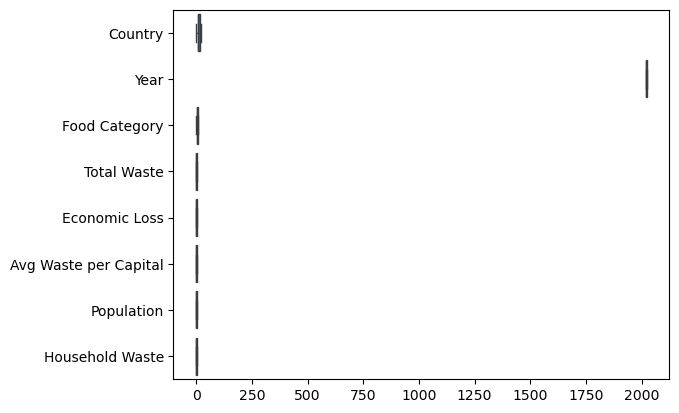

In [20]:
sns.boxplot(data=data,orient='h')
plt.show();

In [29]:
X = data.drop(['Total Waste'],axis=1)
y = data['Total Waste']

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [31]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(
    DecisionTreeRegressor(),
    param_grid,
    cv=5
)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [35]:
DTR = DecisionTreeRegressor(max_depth= 5, min_samples_leaf= 5, min_samples_split= 2)
DTR.fit(X_r_train,y_r_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)

In [36]:
y_pred = DTR.predict(X_test)
y_pred

array([-0.70857397,  0.83076603, -0.81607367, -0.43625919, -0.20013561,
       -0.43625919,  0.56350684, -1.45277819,  0.56350684, -0.6497181 ,
        0.83076603, -1.1123754 ,  0.28880375, -0.43625919, -0.43625919,
       -0.20013561, -1.22228241, -0.0811225 ,  0.96788706, -0.70857397,
        0.04595926,  0.7167186 , -0.43625919,  0.83076603,  1.12156035,
       -1.5746521 ,  0.28880375, -0.70857397,  0.56350684, -0.30422389,
       -1.22228241,  1.51698312,  1.64322467,  0.44077208, -1.34265516,
        0.19042114, -1.34265516,  1.12156035, -0.70857397,  0.28880375,
       -1.03205569,  1.51698312,  0.28880375,  0.5778799 ,  1.64322467,
       -0.0811225 ,  0.44077208, -1.22228241, -1.22228241,  0.7167186 ,
       -1.22228241, -0.30422389, -0.0811225 , -1.1123754 ,  0.28880375,
        0.28880375,  1.38943181,  0.28880375, -1.03205569,  0.96788706,
       -0.70857397,  0.56350684, -0.0811225 ,  0.83076603,  0.5778799 ,
       -1.67849269, -1.22228241,  0.7167186 , -1.03205569, -1.57

In [37]:
pred = DTR.predict(X_train)
pred

array([ 0.83076603, -1.45277819,  0.19042114, ...,  1.12156035,
       -0.70857397, -1.1123754 ])

In [38]:
from sklearn.metrics import accuracy_score,r2_score
r2_score(y_test,y_pred)

0.960810176870666

In [39]:
r2_score(y_train,pred)

0.9593253568031814

# PIPELINE MODEL

In [40]:
data = pd.read_csv('global_food_wastage_dataset.csv')
data

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06
...,...,...,...,...,...,...,...,...
4995,France,2021,Beverages,47524.74,48058.40,77.41,1087.46,39.73
4996,Australia,2021,Beverages,32337.72,32705.08,194.35,1336.32,64.83
4997,China,2018,Meat & Seafood,20640.96,22485.33,21.04,16.13,31.23
4998,Australia,2021,Beverages,26566.64,29357.57,197.14,1086.17,69.95


In [41]:
data.rename(columns={'Total Waste (Tons)':'Total Waste'},inplace=True)
data.rename(columns={'Economic Loss (Million $)':'Economic Loss'},inplace=True)
data.rename(columns={'Avg Waste per Capita (Kg)':'Avg Waste per Capital'},inplace=True)
data.rename(columns={'Population (Million)':'Population'},inplace=True)
data.rename(columns={'Household Waste (%)':'Household Waste'},inplace=True)

In [42]:
data['Waste'] = pd.qcut(data['Total Waste'],q=3,labels=[0,1,2])
data.head(1)

,Country,Year,Food Category,Total Waste,Economic Loss,Avg Waste per Capital,Population,Household Waste,Waste
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64,1


In [43]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier,GradientBoostingRegressor,RandomForestClassifier,RandomForestRegressor
from xgboost import XGBClassifier,XGBRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

In [44]:
data['Total Waste'] = data['Total Waste'].astype('int64')
data['Waste'] = data['Waste'].astype('int64')

In [45]:
data.dtypes

Country                   object
Year                       int64
Food Category             object
Total Waste                int64
Economic Loss            float64
Avg Waste per Capital    float64
Population               float64
Household Waste          float64
Waste                      int64
dtype: object

In [46]:
cat = data.select_dtypes(include=['object']).columns
num = data.select_dtypes(include=['int64','float64']).columns

In [47]:
num = num.drop(['Waste','Total Waste'])
num

Index(['Year', 'Economic Loss', 'Avg Waste per Capital', 'Population',
       'Household Waste'],
      dtype='object')

In [60]:
num_pipe = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())])


cat_pipe = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))])

prep_pipe = ColumnTransformer(transformers=[
    ('num',num_pipe,num),
    ('cat',cat_pipe,cat)])

reg = {
    'AdaBoost':AdaBoostRegressor(random_state=42),
    'GradiantBoosting':GradientBoostingRegressor(random_state=42),
    'XGBoost':XGBRegressor(random_state=42,objective='reg:squarederror'),
    'LR':LinearRegression(),
    'DTR':DecisionTreeRegressor(),
    'knn_rg':KNeighborsRegressor(n_neighbors=5,metric='l2'),
    'RFR':RandomForestRegressor()}
cls = {
    'GradiantBoosting':GradientBoostingClassifier(random_state=42),
    'XGBoost':XGBClassifier(random_state=42,objective='reg:squarederror'),
    'DTC':DecisionTreeClassifier(),
    'LR':LinearRegression(),
    'RFC':RandomForestClassifier(),
    'knn_cl':KNeighborsClassifier(n_neighbors=5,metric='l2'),
    'AdaBoost':AdaBoostClassifier(random_state=42),
    'LR':LogisticRegression()}

In [61]:
X_c = data.drop(['Waste'],axis=1)
y_c = data['Waste']
X_r = data.drop(['Total Waste'],axis=1)
y_r = data['Total Waste']

In [62]:
for name,model in reg.items():
    print('=======')
    pipe = Pipeline(steps=[
    ('preprocessor',prep_pipe),
    ('model',model)
    ])
    pipe.fit(X_r_train,y_r_train)
    print('Fitting for',name,'Regressor')
    y_pred = pipe.predict(X_r_test)
    rmse = np.sqrt(mean_squared_error(y_r_test,y_pred))
    r2 = r2_score(y_r_test,y_pred)
    print(f'{name}_rmse = {rmse}')
    print(f'{name}_r2_score = {r2}')
    print('______________________\n')

Fitting for AdaBoost Regressor
AdaBoost_rmse = 0.21390974810603602
AdaBoost_r2_score = 0.9549608880589909
______________________

Fitting for GradiantBoosting Regressor
GradiantBoosting_rmse = 0.20444859720125896
GradiantBoosting_r2_score = 0.9588569071133229
______________________

Fitting for XGBoost Regressor
XGBoost_rmse = 0.22909715096672892
XGBoost_r2_score = 0.9483383773543945
______________________

Fitting for LR Regressor
LR_rmse = 0.22428410927575898
LR_r2_score = 0.950486266459079
______________________

Fitting for DTR Regressor
DTR_rmse = 0.30083622160773527
DTR_r2_score = 0.9109182137095275
______________________

Fitting for knn_rg Regressor
knn_rg_rmse = 0.3351866267981551
knn_rg_r2_score = 0.889413520665541
______________________

Fitting for RFR Regressor
RFR_rmse = 0.2145849404786352
RFR_r2_score = 0.9546761132057777
______________________



In [63]:
X_c_train,X_c_test,y_c_train,y_c_test = train_test_split(X_c,y_c,test_size=0.2)

In [64]:
for name,model in cls.items():
    print('=======')
    pipe = Pipeline(steps=[
    ('preprocessor',prep_pipe),
    ('model',model)
    ])
    pipe.fit(X_c_train,y_c_train)
    print('Fitting for',name,'Classification')
    y_pred = pipe.predict(X_c_test)
    rmse = np.sqrt(mean_squared_error(y_c_test,y_pred))
    acc = accuracy_score(y_c_test,y_pred)
    print(f'{name}_rmse = {rmse}')
    print(f'{name}_acc = {acc}')
    print('______________________\n')

Fitting for GradiantBoosting Classification
GradiantBoosting_rmse = 0.3301514803843836
GradiantBoosting_acc = 0.891
______________________

Fitting for XGBoost Classification
XGBoost_rmse = 0.35777087639996635
XGBoost_acc = 0.872
______________________

Fitting for DTC Classification
DTC_rmse = 0.37416573867739417
DTC_acc = 0.86
______________________

Fitting for LR Classification
LR_rmse = 0.31464265445104544
LR_acc = 0.901
______________________

Fitting for RFC Classification
RFC_rmse = 0.3255764119219941
RFC_acc = 0.894
______________________

Fitting for knn_cl Classification
knn_cl_rmse = 0.4393176527297759
knn_cl_acc = 0.807
______________________

Fitting for AdaBoost Classification
AdaBoost_rmse = 0.6693280212272604
AdaBoost_acc = 0.552
______________________



In [65]:
import pickle

In [66]:
with open("decision_tree_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Model saved!")

✅ Model saved!
